In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("height-weight (1).csv")

Text(0, 0.5, 'Height')

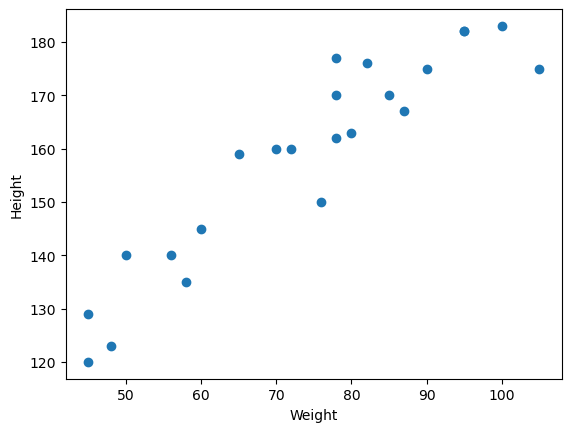

In [5]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [11]:
#divide our dataset into independent and dependent dataset
x=df[['Weight']] #independent
y=df['Height'] #dependent

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [10]:
#standardize the dataset train independent data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [15]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

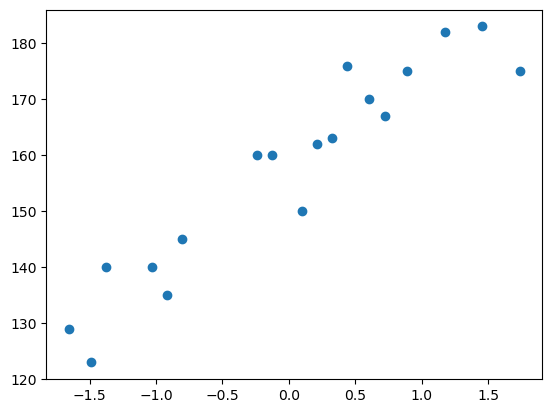

In [17]:
plt.scatter(x_train,y_train)

In [18]:
# Train the simple linear regression model

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [19]:
regressor.fit(x_train,y_train)

LinearRegression()

In [21]:
print("The slope or coeff of weight:",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coeff of weight: [17.03440872]
Intercept: 157.5


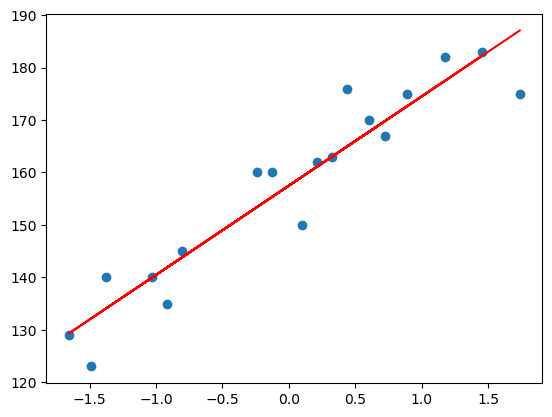

In [23]:
#creating the best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),'r')

Prediction of train/test data
1.Predicted height output=intercept + coef_(weights)

2.y_pred_train = regressor.intercept_ + regressor.coef_(x_train or x_test)

In [24]:
y_pred_test=regressor.predict(x_test)
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [25]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

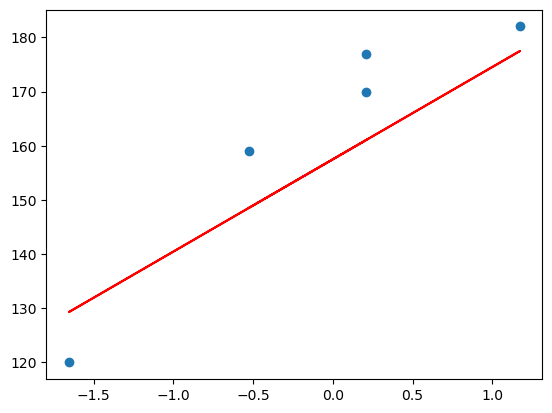

In [26]:
#creating the best fit line for predicted points
plt.scatter(x_test,y_test)
plt.plot(x_test,regressor.predict(x_test),'r')

In [ ]:
#Performance Metrics
#MSE,MAE,RMSE
#R-SQ Adjusted R-sq

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MSE=mean_squared_error(y_test,y_pred_test)
MAE=mean_absolute_error(y_test,y_pred_test)
RMSE=np.sqrt(MSE)

print(MSE,"\n",MAE,"\n",RMSE)

109.77592599051654 
 9.822657814519227 
 10.477400726827076


In [31]:
score=r2_score(y_test,y_pred_test)
score

0.7769869860423441

In [32]:
#Adjusted R sq
ARsq=1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
ARsq

0.7026493147231254

In [33]:
#new data point Weight is 80

scaled_weight=scaler.transform([[80]])
scaled_weight

c:\Users\RITIK KUMAR\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [34]:
regressor.predict(scaled_weight)

array([163.01076266])

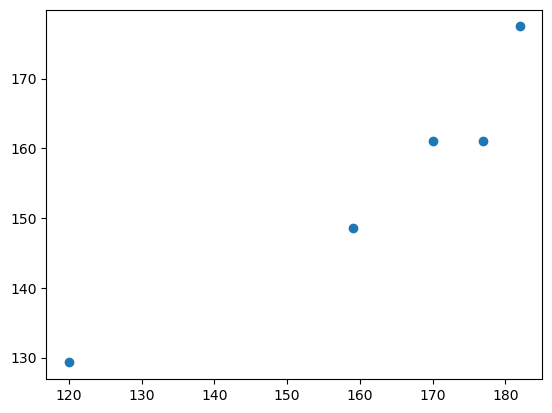

In [35]:
#Assumptions
#plot scatter plot for prediction
plt.scatter(y_test,y_pred_test)

In [36]:
#Residuals

residuals=y_test-y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

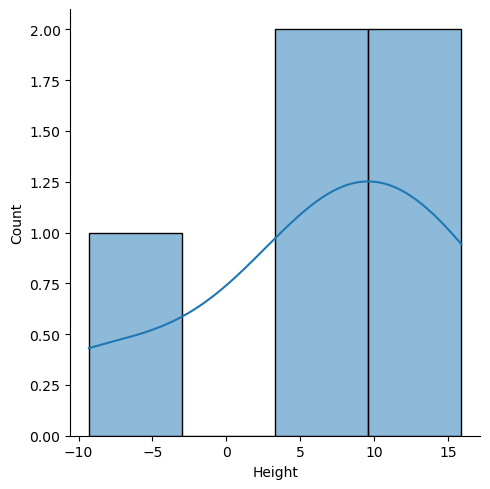

In [38]:
#plot residuals
sb.displot(residuals,kde=True)